<a href="https://colab.research.google.com/github/VempatiAnushaReddy3101/cat-vs-dog-classification/blob/master/CNN_Dog_or_cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [ ]:
#Intialize the model
model=Sequential()

In [ ]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
#Add Flattening Layer
model.add(Flatten())

In [ ]:
#Add Hidden Layer
model.add(Dense(init="uniform",activation="relu",output_dim=120))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="uniform")`
  


In [ ]:
#Add Output layer
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [ ]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory('C:/Users/Sneha/Desktop/CNN/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('C:/Users/Sneha/Desktop/CNN/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 8010 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


In [ ]:
print(x_train.class_indices)

{'cats': 0, 'dogs': 1}


In [ ]:
model.fit_generator(x_train,
                         steps_per_epoch = 250,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/10
250/250 [==============================] - 220s 878ms/step - loss: 0.6865 - accuracy: 0.5458 - val_loss: 0.7160 - val_accuracy: 0.6392
Epoch 2/10
250/250 [==============================] - 43s 173ms/step - loss: 0.6274 - accuracy: 0.6473 - val_loss: 0.5063 - val_accuracy: 0.6952
Epoch 3/10
250/250 [==============================] - 48s 193ms/step - loss: 0.5889 - accuracy: 0.6838 - val_loss: 0.4841 - val_accuracy: 0.7221
Epoch 4/10
250/250 [==============================] - 43s 173ms/step - loss: 0.5555 - accuracy: 0.7132 - val_loss: 0.6167 - val_accuracy: 0.7181
Epoch 5/10
250/250 [==============================] - 42s 169ms/step - loss: 0.5369 - accuracy: 0.7309 - val_loss: 0.4349 - val_accuracy: 0.7286
Epoch 6/10
250/250 [==============================] - 43s 171ms/step - loss: 0.5189 - accuracy: 0.7403 - val_loss: 0.4798 - val_accuracy: 0.6922
Epoch 7/10
250/250 [==============================] - 46s 185ms/step - loss: 0.5091 - accuracy: 0.7450 - val_loss: 0.3997 - val_

In [ ]:
model.save("mymodel.h5")

In [ ]:
from keras.models import load_model
import numpy as np
import cv2

In [ ]:

# model = load_model('mymodel.h5')
# model.compile(loss='categorical_crossentropy',
#                       optimizer='adam',
#                       metrics=['accuracy'])

from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")


In [ ]:
frame=cv2.imread("C:/Users/Sneha/Desktop/CNN/training_set/cats/cat.1.jpg")
data = detect(frame)

[[0.335365]]
[[0]]


In [ ]:
frame=cv2.imread("C:/Users/Sneha/Desktop/CNN/training_set/dogs/dog.6.jpg")
data = detect(frame)

[[0.9650617]]
[[1]]


In [ ]:
frame=cv2.imread("C:/Users/Sneha/Desktop/CNN/test_set/dogs/dog.4003.jpg")
data = detect(frame)

[[0.8056739]]
[[1]]


# Observation
When we are uploading Train_set-cat image:it predicts 0.33 and it belongs to 0 class ,Train_set-dog image:it predicts 0.96 and it belongs to 1 class ,Test_set-dog image:it predicts 0.80 and it belongs to 1 class 

In [ ]:
history = model.history.history

In [ ]:
for key in history.keys():
    print(key)

val_loss
val_accuracy
loss
accuracy


In [ ]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

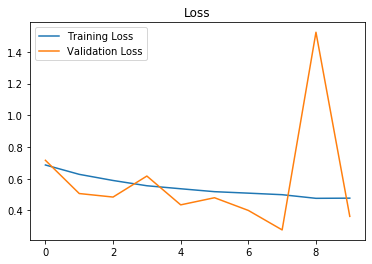

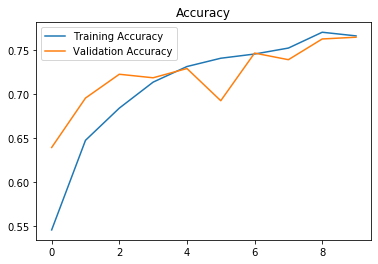

In [ ]:
plot_metrics(history)

# Conclusion
By using this Model: Accuracy:76%, val_accuracy:76%